In [48]:
import os
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [3]:
os.getcwd()

'C:\\Users\\dhvani'

# Introduction to pandas

pandas provides rich data structures and functions designed to make working with structured data fast, easy, and expressive. It is, as you will see, one of the critical ingredients enabling Python to be a powerful and productive data analysis environment. The primary object in pandas that will be used in this book is the DataFrame, a twodimensional tabular, column-oriented data structure with both row and column labels. pandas combines the high performance array-computing features of NumPy with the flexible data manipulation capabilities of spreadsheets and relational databases (such as SQL). It provides sophisticated indexing functionality to make it easy to reshape, slice and dice, perform aggregations, and select subsets of data.

To get started with pandas, you will need to get comfortable with its two workhorse
data structures: Series and DataFrame

## Series

A Series is a one-dimensional array-like object containing an array of data (of any
NumPy data type) and an associated array of data labels, called its index. The simplest
Series is formed from only an array of data:

[Syntax for Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)

In [4]:
obj = Series([1, 2, 3, 4])

The string representation of a Series displayed interactively shows the index on the left
and the values on the right. Since we did not specify an index for the data, a default
one consisting of the integers 0 through N - 1 (where N is the length of the data) is
created. You can get the array representation and index object of the Series via its values
and index attributes, respectively:

In [5]:
obj.values

array([1, 2, 3, 4], dtype=int64)

In [6]:
obj.index

RangeIndex(start=0, stop=4, step=1)

Often it will be desirable to create a Series with an index identifying each data point:

In [7]:
obj2 = Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])

In [8]:
obj2

a    1
b    2
c    3
d    4
dtype: int64

In [9]:
obj2['a']

1

In [10]:
obj2['e'] = -6

In [11]:
obj2

a    1
b    2
c    3
d    4
e   -6
dtype: int64

In [12]:
obj2['a', 'b', 'c']

KeyError: ('a', 'b', 'c')

In [13]:
obj2[['a', 'b', 'c']]

a    1
b    2
c    3
dtype: int64

In [14]:
1 in obj2.values

True

In [15]:
'a' in obj2

True

Should you have data contained in a Python dict, you can create a Series from it by
passing the dict:

[Python Dictionaries](https://docs.python.org/2/tutorial/datastructures.html#dictionaries)

[Dictionary to pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.from_dict.html)

In [18]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [19]:
obj3 = Series(sdata)

In [20]:
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

When only passing a dict, the index in the resulting Series will have the dict’s keys in
sorted order.

In [21]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [22]:
obj4 = Series(sdata, index=states)

In [23]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In this case, 3 values found in sdata were placed in the appropriate locations, but since
no value for 'California' was found, it appears as NaN (not a number) which is considered
in pandas to mark missing or NA values. I will use the terms “missing” or “NA”
to refer to missing data. The isnull and notnull functions in pandas should be used to
detect missing data:

[Syntax for isnull](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html)

In [24]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [39]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

[Syntax for fillna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

In [25]:
obj4.fillna(0)

California        0.0
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

## DataFrames

A DataFrame represents a tabular, spreadsheet-like data structure containing an ordered
collection of columns, each of which can be a different value type (numeric,
string, boolean, etc.). The DataFrame has both a row and column index; it can be
thought of as a dict of Series.

There are numerous ways to construct a DataFrame, though one of the most common
is from a dict of equal-length lists or NumPy arrays

In [26]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]
       }

[DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

In [31]:
frame = pd.DataFrame(data)

The resulting DataFrame will have its index assigned automatically as with Series, and
the columns are placed in sorted order:

In [32]:
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [33]:
frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'],index=['one', 'two', 'three', 'four', 'five'])

In [34]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [36]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

A column in a DataFrame can be retrieved as a Series either by dict-like notation or by
attribute:

In [37]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [38]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

Columns can be modified by assignment. For example, the empty 'debt' column could
be assigned a scalar value or an array of values:

In [39]:
frame2.debt = 16.5

In [40]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


Another common form of data is a nested dict of dicts format:

In [41]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [42]:
frame3 = DataFrame(pop)

In [43]:
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


If passed to DataFrame, it will interpret the outer dict keys as the columns and the inner
keys as the row indices.

In [44]:
frame3.T  # transposing the dataframe

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


## Creating DataFrames from existing frames

In [49]:
pdata = {'Ohio': frame3['Ohio'][:-1],'Nevada': frame3['Nevada'][:2]}

In [50]:
DataFrame(pdata)

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7


To give continuous values in DataFrames.

In [53]:
frame4 = DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'],columns=['Ohio', 'Texas', 'California'])

In [54]:
frame4

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


The columns can be reindexed using the columns keyword:

[Reindexing](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html)

In [55]:
states = ['Texas', 'Utah', 'California']

In [56]:
frame4.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [57]:
frame4.index = ['aa', 'bb', 'cc']

In [58]:
frame4

,Ohio,Texas,California
aa,0,1,2
bb,3,4,5
cc,6,7,8


In [71]:
index = ['Firefox', 'Chrome', 'Safari', 'IE10', 'Konqueror']
df = pd.DataFrame({ 'http_status': [200,200,404,404,301],'response_time': [0.04, 0.02, 0.07, 0.08, 1.0]},index=index)
new_index= ['Safari', 'Iceweasel', 'Comodo Dragon', 'IE10','Chrome']
df.reindex(new_index)

,http_status,response_time
Safari,404.0,0.07
Iceweasel,NaN,NaN
Comodo Dragon,NaN,NaN
IE10,404.0,0.08
Chrome,200.0,0.02


## Creating Dataframes using Multiple Lists

In [173]:
l = [(5,7,151),
    (2,29,151),
    (8, 40, 151),
    (20, 5, 151)
    ]

In [174]:
frame1 = pd.DataFrame(l, columns=['u','v','d'])

In [175]:
frame1

,u,v,d
0,5,7,151
1,2,29,151
2,8,40,151
3,20,5,151


The stack method turns column names into index values, and the unstack method turns index values into column names. So by shifting the values into the index, we can use stack and unstack to perform the swap.

In [178]:
frame1[['u','v','d']].unstack()

u  0      5
   1      2
   2      8
   3     20
v  0      7
   1     29
   2     40
   3      5
d  0    151
   1    151
   2    151
   3    151
dtype: int64

In [179]:
frame1[['u','v','d']].stack()

0  u      5
   v      7
   d    151
1  u      2
   v     29
   d    151
2  u      8
   v     40
   d    151
3  u     20
   v      5
   d    151
dtype: int64

## Dropping entries from axis

[Drop rows and columns](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [59]:
obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])

In [60]:
new_obj = obj.drop('c')

In [61]:
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [62]:
data = DataFrame(np.arange(16).reshape((4, 4)), index=['Ohio', 'Colorado', 'Utah', 'New York'],columns=['one', 'two', 'three', 'four'])

In [63]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [64]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [65]:
data.drop(['one', 'two'], axis=1)

,three,four
Ohio,2,3
Colorado,6,7
Utah,10,11
New York,14,15


## Indexing, Selecting and Filtering

There are multiple ways to select and index rows and columns from Pandas DataFrames. I find tutorials online focusing on advanced selections of row and column choices a little complex for my requirements.

Selection Options
There’s three main options to achieve the selection and indexing activities in Pandas, which can be confusing. The three selection cases and methods covered in this post are:

Selecting data by row numbers (.iloc)
Selecting data by label or by a conditional statment (.loc)
Selecting in a hybrid approach (.ix)

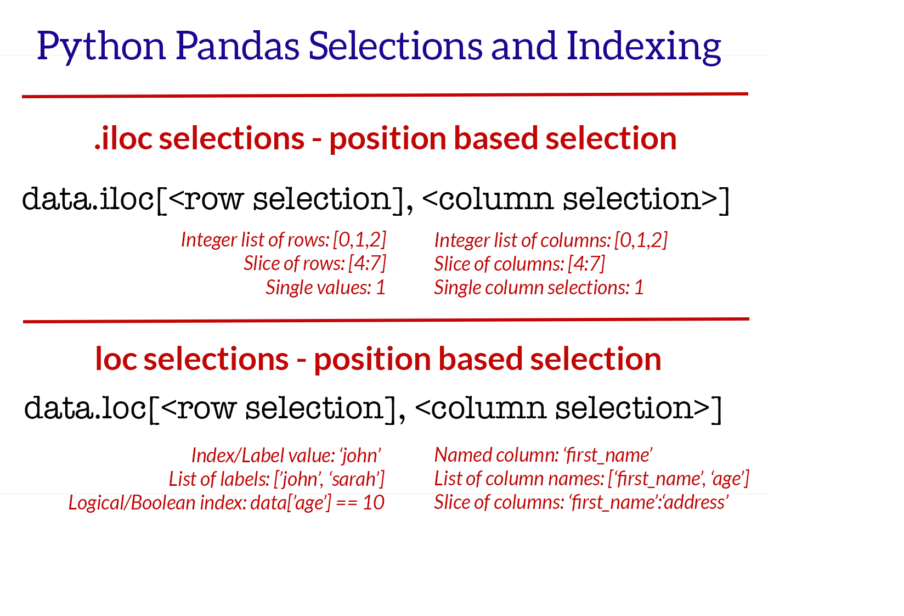

In [72]:
from IPython.display import Image
Image("selection.png")

In [66]:
data = DataFrame(np.arange(16).reshape((4, 4)),index=['Ohio', 'Colorado', 'Utah', 'New York'],columns=['one', 'two', 'three', 'four'])

In [75]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


To view Rows:

In [76]:
data[2:4]

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


To view all the rows but specific columns:

In [83]:
data.loc[:,['one', 'two']]

,one,two
Ohio,0,1
Colorado,4,5
Utah,8,9
New York,12,13


In [77]:
data.ix['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [78]:
data.ix[['Colorado', 'Utah'], [3, 0, 1]]

,four,one,two
Colorado,7,4,5
Utah,11,8,9


In [79]:
data.ix[:,['one','two']]

,one,two
Ohio,0,1
Colorado,4,5
Utah,8,9
New York,12,13


In [81]:
data.ix[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [82]:
data.ix[:'Utah', 'two']

Ohio        1
Colorado    5
Utah        9
Name: two, dtype: int32

In [83]:
data.iat[2,2]

10

## Filtering

In [84]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [85]:
data[data < 5]

,one,two,three,four
Ohio,0.0,1.0,2.0,3.0
Colorado,4.0,NaN,NaN,NaN
Utah,NaN,NaN,NaN,NaN
New York,NaN,NaN,NaN,NaN


In [86]:
data[data >= 5]

,one,two,three,four
Ohio,NaN,NaN,NaN,NaN
Colorado,NaN,5.0,6.0,7.0
Utah,8.0,9.0,10.0,11.0
New York,12.0,13.0,14.0,15.0


In [87]:
data.ix[data.three > 5, :3]

,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


Filtering rows based on condition on columns

In [92]:
data.loc[data['one'] == 4]

,one,two,three,four
Colorado,4,5,6,7


Selecting some column values based on a given row

In [97]:
data.loc['Colorado'] == 4

one       True
two      False
three    False
four     False
Name: Colorado, dtype: bool

In [103]:
data.ix['Colorado'] > 4

one      False
two       True
three     True
four      True
Name: Colorado, dtype: bool

## Arithmatic and data alignment

One of the most important pandas features is the behavior of arithmetic between objects
with different indexes. When adding together objects, if any index pairs are not
the same, the respective index in the result will be the union of the index pairs. Let’s
look at a simple example:

In [104]:
s1 = Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [105]:
s1, s2

(a    7.3
 c   -2.5
 d    3.4
 e    1.5
 dtype: float64, a   -2.1
 c    3.6
 e   -1.5
 f    4.0
 g    3.1
 dtype: float64)

In [107]:
s1['a']

7.2999999999999998

In [106]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

The internal data alignment introduces NA values in the indices that don’t overlap.
Missing values propagate in arithmetic computations.
In the case of DataFrame, alignment is performed on both the rows and the columns:

In [108]:
(s1 + s2).fillna(s1['a'])

a    5.2
c    1.1
d    7.3
e    0.0
f    7.3
g    7.3
dtype: float64

## Arithmatic methods to fill values

In [109]:
df1 = DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))

In [110]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [111]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [112]:
np.arange(12.)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.])

In [91]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


[Syntax for adding DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.add.html)

In [114]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


## Function application and mapping

In [118]:
frame = DataFrame(np.random.randn(4, 3), columns=list('bde'),index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [119]:
frame

,b,d,e
Utah,0.193058,0.128672,-0.494750
Ohio,-0.200954,1.063641,0.438643
Texas,-0.375249,-0.264826,0.307941
Oregon,0.314738,0.145738,-1.062661


In [120]:
np.abs(frame)

,b,d,e
Utah,0.193058,0.128672,0.494750
Ohio,0.200954,1.063641,0.438643
Texas,0.375249,0.264826,0.307941
Oregon,0.314738,0.145738,1.062661


In [121]:
def test(s):
    return s.max()

In [122]:
test(frame)

b    0.314738
d    1.063641
e    0.438643
dtype: float64

[Apply Syntax](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.apply.html)

In [124]:
f = lambda x: x.max()

In [125]:
frame.apply(f)

b    0.314738
d    1.063641
e    0.438643
dtype: float64

In [126]:
f = lambda x: x.min()

In [127]:
frame.apply(f)

b   -0.375249
d   -0.264826
e   -1.062661
dtype: float64

The function passed to apply need not return a scalar value, it can also return a Series
with multiple values:

In [128]:
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])

In [130]:
frame.apply(f)

,b,d,e
min,-0.375249,-0.264826,-1.062661
max,0.314738,1.063641,0.438643


Element-wise Python functions can be used, too. Suppose you wanted to compute a
formatted string from each floating point value in frame. You can do this with applymap:

The reason for the name applymap is that Series has a map method for applying an element-
wise function:

In [134]:
format = lambda x: '%.2f' % x

In [135]:
frame['e'].map(format)

Utah      -0.49
Ohio       0.44
Texas      0.31
Oregon    -1.06
Name: e, dtype: object

## Sorting and ranking

Sorting a data set by some criterion is another important built-in operation. To sort
lexicographically by row or column index, use the sort_index method, which returns
a new, sorted object:

In [136]:
obj = Series(range(4), index=['d','a','b','c'])

In [137]:
obj

d    0
a    1
b    2
c    3
dtype: int32

In [138]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int32

With a DataFrame, you can sort by index on either axis:

In [139]:
frame = DataFrame(np.arange(8).reshape(2, 4), columns=['d','a','b','c'], index=['three', 'one'])

[Syntax for sorting](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_index.html)

In [142]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [143]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


The data is sorted in ascending order by default, but can be sorted in descending order,
too:

In [144]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


To sort a Series by its values, use its order method:
[Syntax](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

In [145]:
obj = Series([4, 6, -3, 0])

In [146]:
obj.sort_values()

2   -3
3    0
0    4
1    6
dtype: int64

In [147]:
obj.sort_values(ascending=False)

1    6
0    4
3    0
2   -3
dtype: int64

Any missing values are sorted to the end of the Series by default:

In [148]:
obj = Series([4, np.nan, 7, np.nan, -3, 2])

In [149]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

On DataFrame, you may want to sort by the values in one or more columns. To do so,
pass one or more column names to the by option:

In [150]:
frame = DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})

In [151]:
frame

,a,b
0,0,4
1,1,7
2,0,-3
3,1,2


In [130]:
frame.sort_values(by='b')

,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


In [152]:
frame.sort_values(by=['a','b'])

,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


## Ranking

DataFrame.rank(axis=0, method=’average’, numeric_only=None, na_option=’keep’, ascending=True, pct=False)
Compute numerical data ranks (1 through n) along axis. Equal values are assigned a rank that is the average of the ranks of those values

In [153]:
obj = Series([7, -5, 7, 4, 2, 0, 4])

In [154]:
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [155]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

Ranks can also be assigned according to the order they’re observed in the data:

In [157]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [158]:
obj.rank(method='max')

0    7.0
1    1.0
2    7.0
3    5.0
4    3.0
5    2.0
6    5.0
dtype: float64

Naturally, you can rank in descending order, too:

In [161]:
obj.rank(ascending=False)

0    1.5
1    7.0
2    1.5
3    3.5
4    5.0
5    6.0
6    3.5
dtype: float64

In [162]:
obj.rank(method='dense')

0    5.0
1    1.0
2    5.0
3    4.0
4    3.0
5    2.0
6    4.0
dtype: float64

In [163]:
obj.rank(method='min')

0    6.0
1    1.0
2    6.0
3    4.0
4    3.0
5    2.0
6    4.0
dtype: float64

DataFrame can compute ranks over the rows or the columns:

In [164]:
frame = DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1], 'c': [-2, 5, 8, -2.5]})

In [146]:
#frame

In [147]:
#frame.rank()

In [148]:
#frame.rank(axis=1)

In [165]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'year': [2012, 2012, 2013, 2014, 2014],
        'reports': [4, 24, 31, 2, 3],
        'coverage': [25, 94, 57, 62, 70]}

In [166]:
frame = DataFrame(data, index=['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])

In [167]:
frame

,coverage,name,reports,year
Cochice,25,Jason,4,2012
Pima,94,Molly,24,2012
Santa Cruz,57,Tina,31,2013
Maricopa,62,Jake,2,2014
Yuma,70,Amy,3,2014


Create a new column that is the rank of the value of coverage in ascending order

In [168]:
frame['Ranking'] = frame['coverage'].rank()

In [169]:
frame

,coverage,name,reports,year,Ranking
Cochice,25,Jason,4,2012,1.0
Pima,94,Molly,24,2012,5.0
Santa Cruz,57,Tina,31,2013,2.0
Maricopa,62,Jake,2,2014,3.0
Yuma,70,Amy,3,2014,4.0


In [170]:
frame['Ranking'] = frame['coverage'].rank(ascending=False)

In [171]:
frame

,coverage,name,reports,year,Ranking
Cochice,25,Jason,4,2012,5.0
Pima,94,Molly,24,2012,1.0
Santa Cruz,57,Tina,31,2013,4.0
Maricopa,62,Jake,2,2014,3.0
Yuma,70,Amy,3,2014,2.0


In [156]:
np.random.seed([3,1415]) #Random seed used to initialize the pseudo-random number generator. Can be any integer between 0 and 2**32 - 1
#inclusive

In [157]:
df = pd.DataFrame(dict(
        A=np.random.choice(np.arange(10), 5, False),
        B=np.random.choice(np.arange(10), 5, False),
        C=np.random.choice(np.arange(10), 5, False),
        D=np.random.choice(np.arange(10), 5, False),
    ))

In [158]:
df

,A,B,C,D
0,9,1,6,0
1,4,3,8,2
2,5,5,9,6
3,1,9,7,1
4,7,4,3,9


In [159]:
df.rank()

,A,B,C,D
0,5.0,1.0,2.0,1.0
1,2.0,2.0,4.0,3.0
2,3.0,4.0,5.0,4.0
3,1.0,5.0,3.0,2.0
4,4.0,3.0,1.0,5.0


##  Dealing with duplicate values

Sometimes, you get a messy dataset. For example, you may have to deal with duplicates, which will skew your analaysis.
First of all, you may want to check if you have duplicate records.<br>
[Syntax to find the duplicates](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html)<br>
[Syntax to drop the duplicates](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html)

In [189]:
raw_data = {'first_name': ['Jason', 'Jason', 'Tina', 'Jake', 'Amy'],
        'last_name': ['Miller', 'Miller', 'Ali', 'Milner', 'Cooze'],
        'age': [42, 42, 36, 24, 73],
        'preTestScore': [4, 4, 31, 2, 3],
        'postTestScore': [25, 25, 57, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
1,Jason,Miller,42,4,25
2,Tina,Ali,36,31,57
3,Jake,Milner,24,2,62
4,Amy,Cooze,73,3,70


In [190]:
df.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

You can see that this returns a pandas Series, not a DataFrame.

In [191]:
df.duplicated().min()

False

In [192]:
df.duplicated().sum()

1

This checks if there are duplicate values in a particular column of your DataFrame.

In [193]:
df['first_name'].duplicated()

0    False
1     True
2    False
3    False
4    False
Name: first_name, dtype: bool

Getting rid of duplicate records is easy. Just use:

In [194]:
df.drop_duplicates()

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
2,Tina,Ali,36,31,57
3,Jake,Milner,24,2,62
4,Amy,Cooze,73,3,70


Dropping duplicates from a particular column

In [195]:
df.drop_duplicates('first_name')

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
2,Tina,Ali,36,31,57
3,Jake,Milner,24,2,62
4,Amy,Cooze,73,3,70


Alternatively, you can add ‘keep’ and indicate whether you’d like to keep the first argument (keep=’first’), the last argument (keep=’last’) from the duplicates or drop all the duplicates altogether (keep=False). The default is ‘first’ so if you are happy with that, you don’t need to include this.

In [196]:
df.drop_duplicates(keep='last')

,first_name,last_name,age,preTestScore,postTestScore
1,Jason,Miller,42,4,25
2,Tina,Ali,36,31,57
3,Jake,Milner,24,2,62
4,Amy,Cooze,73,3,70


In [197]:
df.drop_duplicates(keep=False)

,first_name,last_name,age,preTestScore,postTestScore
2,Tina,Ali,36,31,57
3,Jake,Milner,24,2,62
4,Amy,Cooze,73,3,70


##  List Unique Values In A Pandas Column

[Syntax for finding unique values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html)

In [220]:
df = DataFrame(np.random.randint(0,10,size=100).reshape(10,10), columns=np.arange(0,10))

In [221]:
df

,0,1,2,3,4,5,6,7,8,9
0,0,3,2,9,7,8,3,6,2,9
1,8,6,4,4,5,4,0,9,3,9
2,3,3,0,0,5,3,5,8,0,0
3,6,2,3,1,1,6,7,1,1,2
4,7,9,6,4,2,6,8,9,9,3
5,5,0,7,3,6,7,4,4,0,7
6,2,8,7,6,6,0,4,1,1,3
7,8,5,2,8,6,0,5,9,1,6
8,9,4,5,5,6,2,1,3,5,3
9,7,7,8,2,4,3,6,5,7,9


In [212]:
df.values.ravel()

array([0, 5, 7, 6, 8, 4, 5, 1, 0, 3, 3, 9, 6, 0, 9, 3, 0, 9, 0, 9, 3, 8, 5,
       7, 0, 1, 2, 3, 6, 3, 0, 0, 6, 0, 3, 7, 1, 2, 0, 3, 9, 7, 8, 3, 6, 5,
       8, 7, 7, 7, 9, 7, 5, 4, 3, 4, 8, 2, 9, 1, 7, 3, 3, 8, 7, 1, 4, 9, 0,
       8, 1, 7, 7, 8, 9, 9, 5, 1, 3, 6, 8, 5, 5, 1, 3, 3, 7, 7, 8, 7, 0, 5,
       1, 3, 5, 8, 1, 0, 9, 1])

In [213]:
Series(df.values.ravel()).unique()

array([0, 5, 7, 6, 8, 4, 1, 3, 9, 2], dtype=int64)

In [214]:
 %timeit Series(df.values.ravel()).unique()

151 µs ± 9.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [215]:
 %timeit np.unique(df.values.ravel())

37.4 µs ± 189 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


[Syntax to find counts of unique values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

In [222]:
df[1].value_counts()

3    2
9    1
8    1
7    1
6    1
5    1
4    1
2    1
0    1
Name: 1, dtype: int64

Finding unique values in the columns.

In [223]:
pd.unique(df[[1,2]].values.ravel())

array([3, 2, 6, 4, 0, 9, 7, 8, 5], dtype=int64)

Finding unique values in rows.

In [233]:
np.unique((df.ix[0]).values.ravel())

array([0, 2, 3, 6, 7, 8, 9])

##  Summarizing and Computing Descriptive Statistics

pandas objects are equipped with a set of common mathematical and statistical methods.
Most of these fall into the category of reductions or summary statistics, methods
that extract a single value (like the sum or mean) from a Series or a Series of values from
the rows or columns of a DataFrame

Consider a small Dataframe:

In [237]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5],[np.nan, np.nan], [0.75, -1.3]],
               index=['a', 'b', 'c', 'd'],
               columns=['one', 'two'])

In [238]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [239]:
df.sum()  # different rows sum

one    9.25
two   -5.80
dtype: float64

In [240]:
df.sum(axis=1) #different columns sum

a    1.40
b    2.60
c     NaN
d   -0.55
dtype: float64

In [241]:
df.sum(axis=1, skipna=False)

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

To compute index values at which minimum or maximum value are obtained:<br>
[Syntax for Dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html)<br>
[Syntax for Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html)

In [243]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [244]:
df.idxmax()

one    b
two    d
dtype: object

In [245]:
df.idxmin()

one    d
two    b
dtype: object

In [247]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [248]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


## What is 25%, 50%, and 75%

For example, suppose you have 25 test scores, and in order from lowest to highest they look like this: 43, 54, 56, 61, 62, 66, 68, 69, 69, 70, 71, 72, 77, 78, 79, 85, 87, 88, 89, 93, 95, 96, 98, 99, 99.
To find the 90th percentile for these (ordered) scores, start by multiplying 90% times the total number of scores, 
which gives 90% ∗ 25 = 0.90 ∗ 25 = 22.5 (the index). Rounding up to the nearest whole number, you get 23.

Counting from left to right (from the smallest to the largest value in the data set), you go until you find the 23rd value 
in the data set. That value is 98, and it’s the 90th percentile for this data set.

Now say you want to find the 20th percentile. Start by taking 0.20 x 25 = 5 (the index); this is a whole number, 
so the 20th percentile is the average of the 5th and 6th values in the ordered data set (62 and 66). The 20th percentile then comes to (62 + 66) ÷ 2 = 64.

## List of summary statistics and related methods.<br>
<b>Method Description</b><br>
count - Number of non-NA values<br>
describe - Compute set of summary statistics for Series or each DataFrame column<br>
min, max - Compute minimum and maximum values<br>
argmin, argmax - Compute index locations (integers) at which minimum or maximum value obtained, respectively<br>
idxmin, idxmax - Compute index values at which minimum or maximum value obtained, respectively<br>
quantile - Compute sample quantile ranging from 0 to 1<br>
sum - Sum of values<br>
mean - Mean of values<br>
median - Arithmetic median (50% quantile) of values<br>
mad - Mean absolute deviation from mean value<br>
var - Sample variance of values<br>
std - Sample standard deviation of values<br>
skew - Sample skewness (3rd moment) of values<br>
kurt - Sample kurtosis (4th moment) of values<br>
cumsum - Cumulative sum of values<br>
cummin, cummax - Cumulative minimum or maximum of values, respectively<br>
cumprod - Cumulative product of values<br>
diff - Compute 1st arithmetic difference (useful for time series)<br>
pct_change - Compute percent changes<br>

## Handling Missing Data

In [249]:
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado', np.nan])

In [250]:
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
4          NaN
dtype: object

In [251]:
string_data.fillna(0)

0     aardvark
1    artichoke
2            0
3      avocado
4            0
dtype: object

In [252]:
string_data.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [253]:
string_data.notnull()

0     True
1     True
2    False
3     True
4    False
dtype: bool

In [254]:
string_data.dropna()

0     aardvark
1    artichoke
3      avocado
dtype: object

## NA handling methods
<b>Argument Description</b><br>
dropna - Filter axis labels based on whether values for each label have missing data, with varying thresholds for how much
missing data to tolerate.<br>
fillna - Fill in missing data with some value or using an interpolation method such as 'ffill' or 'bfill'.<br>
isnull - Return like-type object containing boolean values indicating which values are missing / NA.<br>
notnull - Negation of isnull.<br>

In [213]:
string_data.dropna()

0     aardvark
1    artichoke
3      avocado
dtype: object

In [214]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [216]:
np.where(np.isnan(df['one']))

(array([2], dtype=int64),)

In [217]:
np.where(np.isnan(df['two']))

(array([0, 2], dtype=int64),)

In [221]:
data = DataFrame([[1,2,np.NaN],[4,5,np.NaN],[6,7,np.NaN]])

In [222]:
data

,0,1,2
0,1,2,NaN
1,4,5,NaN
2,6,7,NaN


In [223]:
data.dropna(axis=1,how='all')

,0,1
0,1,2
1,4,5
2,6,7


In [255]:
raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
        'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
        'age': [42, np.nan, 36, 24, 73],
        'sex': ['m', np.nan, 'f', 'm', 'f'],
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}

In [256]:
DataFrame(raw_data)

,age,first_name,last_name,postTestScore,preTestScore,sex
0,42.0,Jason,Miller,25.0,4.0,m
1,NaN,NaN,NaN,NaN,NaN,NaN
2,36.0,Tina,Ali,NaN,NaN,f
3,24.0,Jake,Milner,62.0,2.0,m
4,73.0,Amy,Cooze,70.0,3.0,f


In [261]:
df = DataFrame(raw_data,columns=['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])

In [258]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [263]:
df.dropna() # or df.dropna(how='any')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [264]:
df.dropna(how='all')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [237]:
df['location']=np.nan

In [238]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [242]:
df = df.dropna(axis=1,how='all')

In [243]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


Drop rows that contain less than five observations

In [244]:
df.dropna(thresh=5)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [245]:
df = df.fillna(0)

In [246]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,0,0,0.0,0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [252]:
df['preTestScore'].fillna(df['preTestScore'].mean(),inplace=True)

In [253]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,3.0,NaN
2,Tina,Ali,36.0,f,3.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [260]:
df[df['last_name'].isnull() & df['sex'].isnull()]

,first_name,last_name,age,sex,preTestScore,postTestScore
1,NaN,NaN,NaN,NaN,3.0,NaN


Drop a row if it contains a certain value (in this case, "Tina")

In [263]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [272]:
df = df.drop((df.first_name != np.nan))

In [280]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


## Concating, Joining and Merging DataFrames


In [266]:
df = pd.DataFrame(np.random.randn(10,4))

In [267]:
df

,0,1,2,3
0,-0.517996,0.495350,-0.384857,-0.182859
1,0.246052,-0.541992,-0.340083,-0.756539
2,1.668771,-0.390413,2.288124,-0.419693
3,0.456657,-0.136347,0.475920,-0.114124
4,-0.335482,-0.776316,-1.251954,0.496240
5,-1.422172,1.306133,0.312929,-0.081828
6,-0.173712,-0.512536,-1.042278,0.289453
7,-1.082939,-0.681194,-0.007473,0.468818
8,0.238071,0.664761,0.053467,-0.377978
9,-1.949372,-0.804063,0.434965,0.523224


In [282]:
pieces = [df[:3], df[3:7], df[7:]]

In [283]:
pieces

[          0         1         2         3
 0 -0.517996  0.495350 -0.384857 -0.182859
 1  0.246052 -0.541992 -0.340083 -0.756539
 2  1.668771 -0.390413  2.288124 -0.419693,
           0         1         2         3
 3  0.456657 -0.136347  0.475920 -0.114124
 4 -0.335482 -0.776316 -1.251954  0.496240
 5 -1.422172  1.306133  0.312929 -0.081828
 6 -0.173712 -0.512536 -1.042278  0.289453,
           0         1         2         3
 7 -1.082939 -0.681194 -0.007473  0.468818
 8  0.238071  0.664761  0.053467 -0.377978
 9 -1.949372 -0.804063  0.434965  0.523224]

In [285]:
(pieces[0])

,0,1,2,3
0,-0.517996,0.495350,-0.384857,-0.182859
1,0.246052,-0.541992,-0.340083,-0.756539
2,1.668771,-0.390413,2.288124,-0.419693


In [287]:
pd.concat(pieces)

,0,1,2,3
0,-0.517996,0.495350,-0.384857,-0.182859
1,0.246052,-0.541992,-0.340083,-0.756539
2,1.668771,-0.390413,2.288124,-0.419693
3,0.456657,-0.136347,0.475920,-0.114124
4,-0.335482,-0.776316,-1.251954,0.496240
5,-1.422172,1.306133,0.312929,-0.081828
6,-0.173712,-0.512536,-1.042278,0.289453
7,-1.082939,-0.681194,-0.007473,0.468818
8,0.238071,0.664761,0.053467,-0.377978
9,-1.949372,-0.804063,0.434965,0.523224


In [292]:
concatenated  = pd.concat(pieces, keys=['first', 'second', 'three'])

In [293]:
concatenated 

0         1         2         3
first  0 -0.517996  0.495350 -0.384857 -0.182859
       1  0.246052 -0.541992 -0.340083 -0.756539
       2  1.668771 -0.390413  2.288124 -0.419693
second 3  0.456657 -0.136347  0.475920 -0.114124
       4 -0.335482 -0.776316 -1.251954  0.496240
       5 -1.422172  1.306133  0.312929 -0.081828
       6 -0.173712 -0.512536 -1.042278  0.289453
three  7 -1.082939 -0.681194 -0.007473  0.468818
       8  0.238071  0.664761  0.053467 -0.377978
       9 -1.949372 -0.804063  0.434965  0.523224

In [295]:
concatenated.ix['first']

,0,1,2,3
0,-0.517996,0.495350,-0.384857,-0.182859
1,0.246052,-0.541992,-0.340083,-0.756539
2,1.668771,-0.390413,2.288124,-0.419693


## Joining

In [316]:
left = pd.DataFrame({'key': ['foo1', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo1', 'foo'], 'rval': [4, 5]})

In [317]:
left

,key,lval
0,foo1,1
1,foo,2


In [318]:
right

,key,rval
0,foo1,4
1,foo,5


In [319]:
pd.merge(left, right)

,key,lval,rval
0,foo1,1,4
1,foo,2,5


In [320]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo1,1,4
1,foo,2,5


##  Appending

In [321]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [322]:
df

,A,B,C,D
0,1.795280,0.278642,0.776443,0.277493
1,-1.638097,-0.526898,-0.289557,-0.757561
2,-0.148264,0.588862,2.619558,1.056833
3,-0.496555,1.421232,-0.006386,0.638818
4,0.583166,0.364079,-3.055356,-1.926225
5,-0.724684,-0.911817,-1.221528,-0.597456
6,0.207626,-0.568183,-0.319089,-0.042530
7,0.036595,0.902382,0.392863,0.253487


In [323]:
s = df.ix[3]

In [324]:
s

A   -0.496555
B    1.421232
C   -0.006386
D    0.638818
Name: 3, dtype: float64

In [325]:
df.append(s, ignore_index=True)

,A,B,C,D
0,1.795280,0.278642,0.776443,0.277493
1,-1.638097,-0.526898,-0.289557,-0.757561
2,-0.148264,0.588862,2.619558,1.056833
3,-0.496555,1.421232,-0.006386,0.638818
4,0.583166,0.364079,-3.055356,-1.926225
5,-0.724684,-0.911817,-1.221528,-0.597456
6,0.207626,-0.568183,-0.319089,-0.042530
7,0.036595,0.902382,0.392863,0.253487
8,-0.496555,1.421232,-0.006386,0.638818


In [326]:
df.append(s)

,A,B,C,D
0,1.795280,0.278642,0.776443,0.277493
1,-1.638097,-0.526898,-0.289557,-0.757561
2,-0.148264,0.588862,2.619558,1.056833
3,-0.496555,1.421232,-0.006386,0.638818
4,0.583166,0.364079,-3.055356,-1.926225
5,-0.724684,-0.911817,-1.221528,-0.597456
6,0.207626,-0.568183,-0.319089,-0.042530
7,0.036595,0.902382,0.392863,0.253487
3,-0.496555,1.421232,-0.006386,0.638818


## Grouping
By “group by” we are referring to a process involving one or more of the following steps<br>
* Splitting the data into groups based on some criteria<br>
* Applying a function to each group independently<br>
* Combining the results into a data structure<br>

In [327]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
'foo', 'bar', 'foo', 'foo'],
'B' : ['one', 'one', 'two', 'three',
'two', 'two', 'one', 'three'],
'C' : np.random.randn(8),
'D' : np.random.randn(8)})

In [328]:
df

,A,B,C,D
0,foo,one,-1.962192,1.572012
1,bar,one,1.920533,-0.063276
2,foo,two,-1.510765,-0.859049
3,bar,three,-0.408779,0.422609
4,foo,two,-1.737879,0.601651
5,bar,two,0.424641,0.373693
6,foo,one,1.771952,-0.655383
7,foo,three,1.117278,1.386866


Grouping and then applying a function sum to the resulting groups.

In [330]:
df.groupby('A').sum()

,C,D
A,,
bar,1.936394,0.733026
foo,-2.321606,2.046097


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [331]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.920533 -0.063276
    three -0.408779  0.422609
    two    0.424641  0.373693
foo one   -0.190240  0.916629
    three  1.117278  1.386866
    two   -3.248644 -0.257398

## Pivot Tables

In [333]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
'B' : ['A', 'B', 'C'] * 4,
'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
'D' : np.random.randn(12),
'E' : np.random.randn(12)})

In [334]:
df

,A,B,C,D,E
0,one,A,foo,0.960297,-2.351596
1,one,B,foo,-0.163605,-1.628105
2,two,C,foo,1.241887,1.043164
3,three,A,bar,0.047881,0.983503
4,one,B,bar,0.863178,1.067114
5,one,C,bar,0.027041,1.529353
6,two,A,foo,0.229372,-0.578857
7,three,B,foo,0.408605,-0.998292
8,one,C,foo,-0.467550,-0.020115
9,one,A,bar,-1.219462,-1.295051


In [335]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.219462  0.960297
      B  0.863178 -0.163605
      C  0.027041 -0.467550
three A  0.047881       NaN
      B       NaN  0.408605
      C  0.516344       NaN
two   A       NaN  0.229372
      B  1.043432       NaN
      C       NaN  1.241887